# LSE DATA ANALYTICS CAREER ACCELERATOR
# COURSE 2 ASSIGNMENT - JUPYTER NOTEBOOK

For this assignment, I have structured my notebook like this:

1. Overview of Section
2. Code used to get key results with comments
3. Code Output
4. Obervations and insights from the code

# Environment preparation 1: Loading the CSVs

In [71]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

In [72]:
#Import the cases and vaccinated csvs using pd.read_csv as cov and vac, respectively.

cov = pd.read_csv("covid_19_uk_cases.csv")
vac = pd.read_csv("covid_19_uk_vaccinated.csv") 

# Exploring the loaded CSVs

In [73]:
# Check the first and last 5 rows of each dataframe using head( ) and tail( )
print(cov.head())
print(cov.tail())

  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0     0.0    0.0        

In [74]:
print(vac.head())
print(vac.tail())

  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Vaccinated  First Dose  Second Dose  
0           0           0  

In [75]:
#Check the number of rows and columns of each dataset with .shape
print(cov.shape)
print(vac.shape)

(7584, 12)
(7584, 11)


In [76]:
#Determine the data types in the DataFrames using dtypes.

print(cov.dtypes)
print(vac.dtypes)

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object


In [77]:
#Determine the number of missing values using .isnull.sum( ).

print(cov.isnull().sum())
print(vac.isnull().sum())

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64
Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64


# Environment Preparation 2: Merging the two csvs & Subsetting

In [78]:
# We have to first make a new primary key as both dataframes do not have a unique key
# The primary key was made by concatenatnig the Province/State column with Date
# As both are unique identifiers of each data point

cov["primary_key"] = cov["Province/State"] + ',' + cov["Date"]
vac["primary_key"] = vac["Province/State"] + ',' + vac["Date"]

In [79]:
# Merge the DataFrames cov and vac via a left join 
# The 'on' parameter was omitted to prevent duplicate columsn from being formed
# in the resulting DataFrame

cov_vac = pd.merge(cov,vac,how="left")

# View the newly merged DataFrame.
cov_vac

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,primary_key,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0,"Anguilla,2020-01-22",0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0,"Anguilla,2020-01-23",0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0,"Anguilla,2020-01-24",0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0,"Anguilla,2020-01-25",0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0,"Anguilla,2020-01-26",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0,"Others,2021-10-10",1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0,"Others,2021-10-11",1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0,"Others,2021-10-12",1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.4360,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0,"Others,2021-10-13",0,0,0


In [14]:
# converting the "Date" column in the merged DataFrame 
# from String to a datetime object

from datetime import datetime 

cov_vac['Date_formatted'] = pd.to_datetime(cov_vac['Date'])

In [15]:
# Double check that the datetime has been successfully formatted.
cov_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 7583
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Province/State            7584 non-null   object        
 1   Country/Region            7584 non-null   object        
 2   Lat                       7584 non-null   float64       
 3   Long                      7584 non-null   float64       
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object        
 5   Sub-region Name           7584 non-null   object        
 6   Intermediate Region Code  7584 non-null   int64         
 7   Date                      7584 non-null   object        
 8   Deaths                    7582 non-null   float64       
 9   Cases                     7582 non-null   float64       
 10  Recovered                 7582 non-null   float64       
 11  Hospitalised              7582 non-null   float64       
 12  Vaccinated          

In [16]:
# Subset the new DataFrame to include only relevant columns
# as per the specified parameters

cov_vac_new = cov_vac[["Province/State",
                      "Country/Region",
                      "Date_formatted",
                      "Vaccinated",
                      "First Dose",
                      "Second Dose",
                      "Deaths",
                      "Cases",
                      "Recovered",
                      "Hospitalised"]]
cov_vac_new

,Province/State,Country/Region,Date_formatted,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,2020-01-22,0,0,0,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,2020-01-23,0,0,0,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,2020-01-24,0,0,0,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,2020-01-25,0,0,0,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,2020-01-26,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,2021-10-10,1070,1216,1070,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,2021-10-11,1300,1604,1300,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,2021-10-12,1482,2027,1482,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,2021-10-13,0,0,0,138080.0,8272883.0,0.0,0.0


In [17]:
# Explore the new DataFrame's shape, column and data types

print(cov_vac_new.shape)
print(cov_vac_new.columns)
print(cov_vac_new.dtypes)

(7584, 10)
Index(['Province/State', 'Country/Region', 'Date_formatted', 'Vaccinated',
       'First Dose', 'Second Dose', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised'],
      dtype='object')
Province/State            object
Country/Region            object
Date_formatted    datetime64[ns]
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
Deaths                   float64
Cases                    float64
Recovered                float64
Hospitalised             float64
dtype: object


# Initial Observations of Gibraltar and whole dataset

## Subsetting the 'cov' DataFrame

In [9]:
# Create DataFrame based on Gibraltar data by filtering the 'cov' DataFrame.

Gibraltar_data = cov[cov["Province/State"]=="Gibraltar"]
Gibraltar_data

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-10,97.0,5626.0,0.0,858.0
4420,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-11,97.0,5655.0,0.0,876.0
4421,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-12,97.0,5682.0,0.0,876.0
4422,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-13,97.0,5707.0,0.0,0.0


In [352]:
# Create DataFrame based on Gibraltar data by filtering the 'vac' DataFrame.

Gibraltar_data_vac = vac[vac["Province/State"]=="Gibraltar"]
Gibraltar_data_vac

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose,primary_key,First Dose Only
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0,"Gibraltar,2020-01-22",0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0,0,0,"Gibraltar,2020-01-23",0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0,0,0,"Gibraltar,2020-01-24",0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0,0,0,"Gibraltar,2020-01-25",0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0,0,0,"Gibraltar,2020-01-26",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-10,2431,2763,2431,"Gibraltar,2021-10-10",332
4420,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-11,2954,3646,2954,"Gibraltar,2021-10-11",692
4421,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-12,3368,4606,3368,"Gibraltar,2021-10-12",1238
4422,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2021-10-13,0,0,0,"Gibraltar,2021-10-13",0


In [ ]:
# Viewing all the rows of the newly created Gibraltar_data DataFrame.

pd.set_option("display.max_rows", None)

Gibraltar_data

In [44]:
# Subsetting the Gibraltar DataFrame with relevant columns:
# i.e. Deaths, Cases, Recovered and Hospitalised

Gibraltar_data_new = Gibraltar_data[["Deaths","Cases","Recovered","Hospitalised"]]

# View the newly subsetted Gibraltar DataFrame.
Gibraltar_data_new

,Deaths,Cases,Recovered,Hospitalised
3792,0.0,0.0,0.0,0.0
3793,0.0,0.0,0.0,0.0
3794,0.0,0.0,0.0,0.0
3795,0.0,0.0,0.0,0.0
3796,0.0,0.0,0.0,0.0
...,...,...,...,...
4419,97.0,5626.0,0.0,858.0
4420,97.0,5655.0,0.0,876.0
4421,97.0,5682.0,0.0,876.0
4422,97.0,5707.0,0.0,0.0


In [45]:
#Run the describe() function to generate descriptive statistics.

Gibraltar_data_new.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


In [354]:
# Calculate the total first and second doses for Gibraltar
Gibraltar_data_vac.groupby("Province/State")[["Vaccinated","First Dose","Second Dose"]].sum()

,Vaccinated,First Dose,Second Dose
Province/State,,,
Gibraltar,5606041,5870786,5606041


In [356]:
# Show the First and Second Doses for Gibraltar over time
Gibraltar_data_vac_melt = pd.melt(Gibraltar_data_vac, ["Province/State","Date"],\
                                  value_vars=["First Dose","Second Dose"],\
                                 palette="colorblind")\
.set_title("Gibraltar Vaccination Status over time")

# Plot a lineplot showing the trends over time
sns.lineplot(x="Date",y="value",hue="variable",data=Gibraltar_data_vac_melt)

TypeError: melt() got an unexpected keyword argument 'palette'

## Initial insights from both DataFrames

Text(0.5, 1.0, 'Death Count over time across all regions')

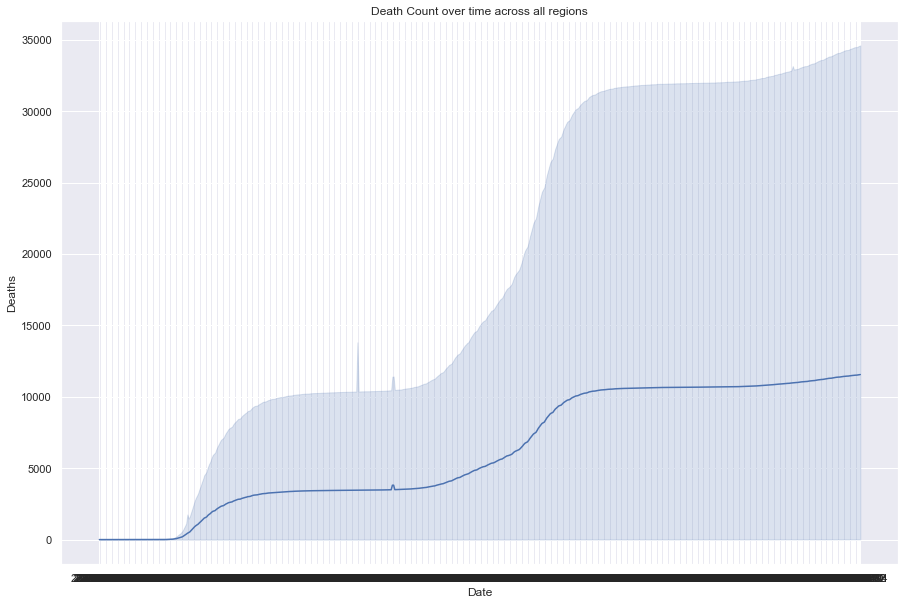

In [89]:
# Providing a line plot to show the trend of Deaths over time across all Provinces.
sns.lineplot(x="Date",y="Deaths",data=cov,palette="colorblind") \
.set_title("Death Count over time across all regions")

Observation: The number of deaths increased exponentialy, but began to plateau over time - perhaps due to the introduction of vaccines or the masses gaining herd immnunity.

Text(0.5, 1.0, 'Recovered Count over time across all regions')

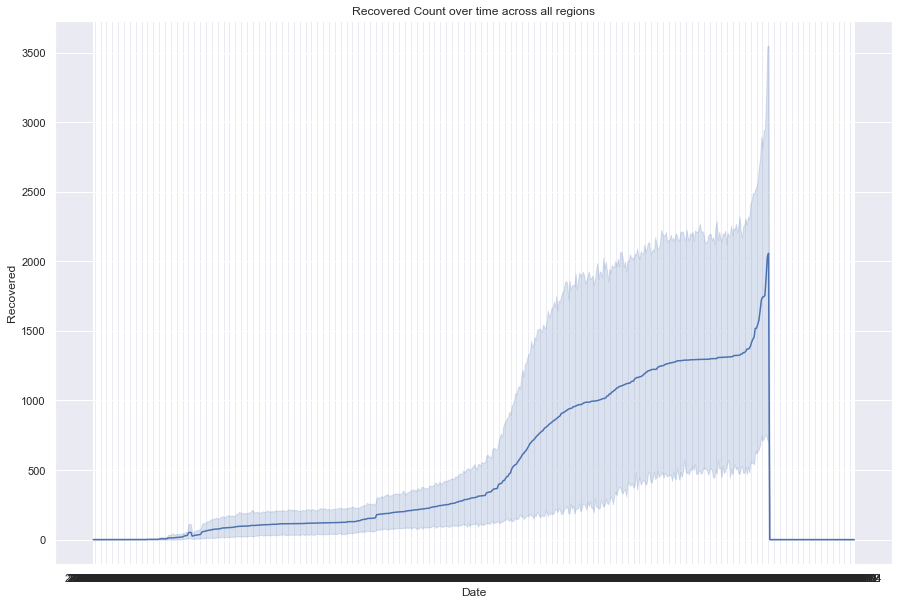

In [86]:
# Providing a line plot to show the trend of recoveries over time across all Provinces.
sns.lineplot(x="Date",y="Recovered",data=cov,palette="colorblind") \
.set_title("Recovered Count over time across all regions")

Observations: The number of recovered cases increases up to a certain day and suddenly drops to 0, suggesting that data collection was incomplete. There are huge confidence intervals suggesting the presence of outliers skewing the data.

Text(0.5, 1.0, 'Hospitalised Count over time across all regions')

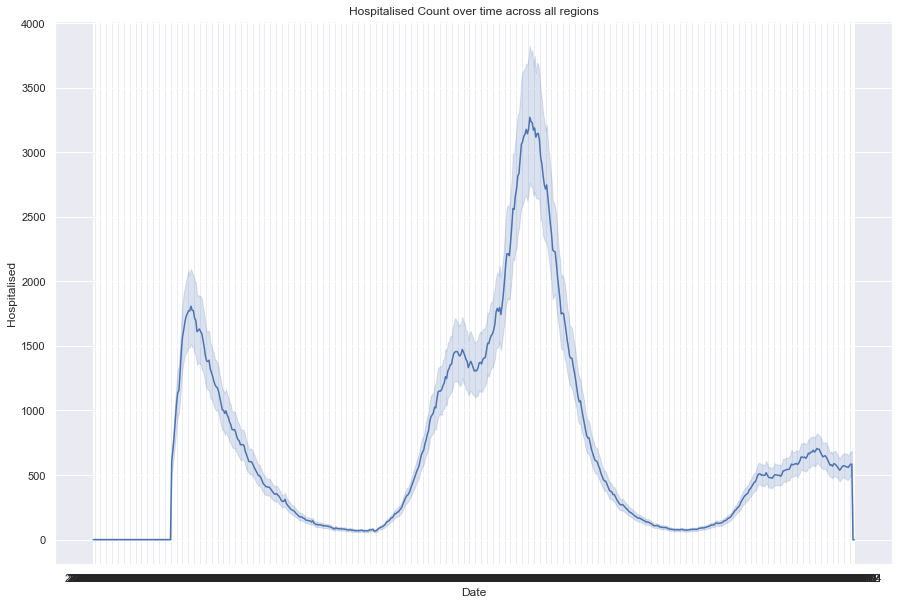

In [87]:
sns.lineplot(x="Date",y="Hospitalised",data=cov,palette="colorblind") \
.set_title("Hospitalised Count over time across all regions")

Observations: There are huge fluctuations in the data. Hospitlaised cases peak and then dip, before steadily increasing and peaking again before dipping again. The initial peak does not appear realistic as the number of hospitalisations shows a sharp drop even though vaccines were only introduced on January. Perhaps we lack contextual information - for instance a lockdown that happened during that period in the UK.

Text(0.5, 1.0, 'Death Count over time across all regions')

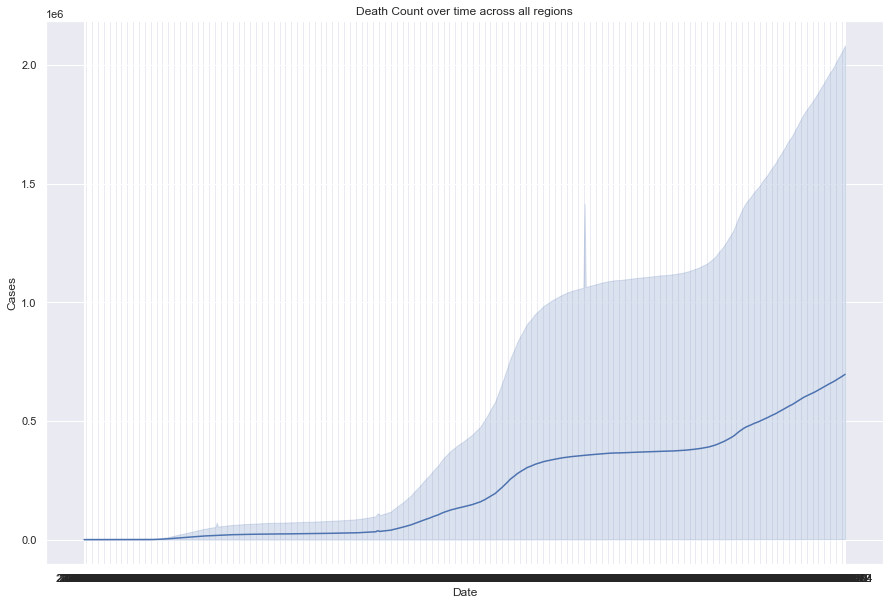

In [88]:
sns.lineplot(x="Date",y="Cases",data=cov,palette="colorblind") \
.set_title("Death Count over time across all regions")

Observations: Cases can be seen accumulating slowly and show no signs of plateauing. From the appearance of the graph alone, the data suggests that the cases are cumulative. The presence of huge confidence intervals indicates that the data is not accurate or has outliers.

Text(0.5, 1.0, 'Vaccination Count over time across all regions')

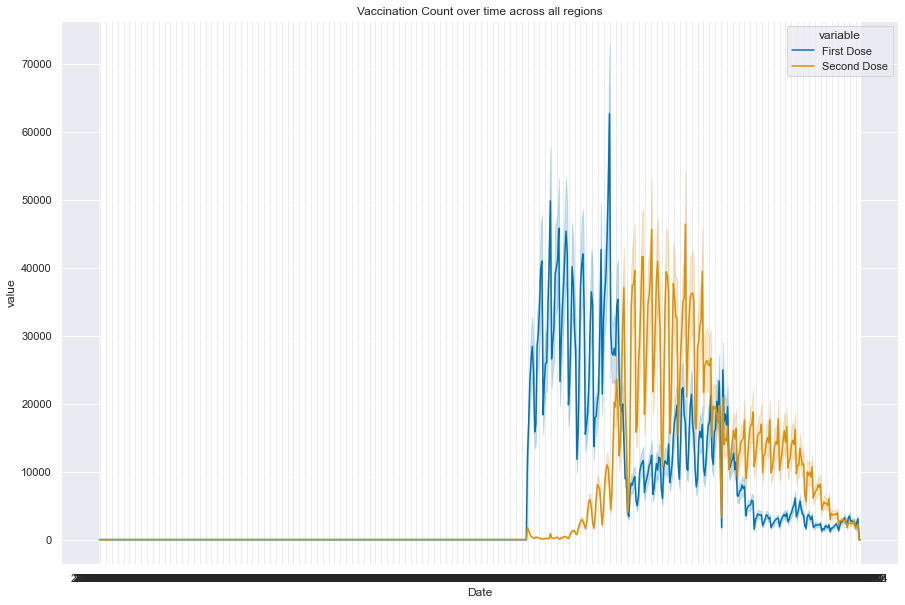

In [85]:
# Trends from first-dose and second-dose vaccinations

# Change the 'vac' DataFrame to 'Long' form using .melt( )
# We choose the value variables to be First Dose and Second Dose so they can be plotted together in the same graph.
vac_2 = pd.melt(vac,["Province/State","Date"], value_vars=["First Dose","Second Dose"])

# View the resulting DataFrame
vac_2

# Plot the new DataFrame as a lineplot to see any trends between the first and second doses over time.
sns.lineplot(x="Date",y="value",data=vac_2,hue="variable",palette="colorblind") \
.set_title("Vaccination Count over time across all regions")


Observations: 
- In general, there are several fluctuations in the number of first doses across all regions, but a clear downward trend closer towards 2021. This indicates of the possibility that the majority of the population have been vaccinated with a first dose, as the number of first doses decrease over time. It could also indicate that there is not enough marketing or incentives for people to vaccinate themselves. 
- What is clear is that the number of second doses lag behind the first doses - they exhibit a sinusoidal relationship; where as the first doses decrease, the second doses steadily increase and vice versa. This indicates that people who are having their first doses are actually getting their second jabs.
- The overall downward trend post-peak could be due to covid burnout (see https://www.healthline.com/health/mental-health/covid-fatigue#signs-and-symptoms), as people seek to relieve themselves of stress from the pandemic by forgoing health guidelines.
- It is possible the circulation of conspriacy theories and fake news (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7395797/) may have confused people to seeking alternative, albeit ineffective, forms of protection from COVID-19.

## Other Observations

- Anomalies in the data:
    - There are 2 missing values in the dataset for Bermuda on the 21st and 22nd of September 2020.  
    - The "Recovered" field become '0' after 5th August 2020 until 14th October 2021 for all provinces.
    - The "Hospitalised" field also becomes '0' after 13th October 2021 onwards for all provinces.
    - There is no data under the "Recovered" field for the province/state "Others".
    - These unusual 0 values and null values suggest that the data is incomplete or collection may not have been finalised.
    - The intermediate region codes and ISO-codes are not unique as the data dictionary would suggest.
    - The DataFrame does not have a deafult index, other than the one provided by Python.
    - The data is inconsistent - at first glance the number of cases, deaths, hospitalisations and recoveries seem    cumulative, but there are days where the numbers stop increasing.
    - Huge confidence intervals in the data, signalling an outlier that should be removed.

# Area which has the highest number of first doses but not second

## - by Absolute Amounts

In [51]:
# Using Groupby and .sum( ) to calculate the difference between the first and second doses per province/state
# Define a new variable Total_doses_state 

Total_doses_state = cov_vac_new.groupby("Province/State")[["First Dose","Second Dose"]].sum()

# Calculate the difference in doses by adding a new column, "Difference in Doses"
Total_doses_state["Difference in doses"] = Total_doses_state["First Dose"] - Total_doses_state["Second Dose"]

# Sort the resulting DataFrame in Descending order
Total_doses_state.sort_values(by="Difference in doses",ascending = False)

,First Dose,Second Dose,Difference in doses
Province/State,,,
Gibraltar,5870786,5606041,264745
Montserrat,5401128,5157560,243568
British Virgin Islands,5166303,4933315,232988
Anguilla,4931470,4709072,222398
Isle of Man,4226984,4036345,190639
Falkland Islands (Malvinas),3757307,3587869,169438
Cayman Islands,3522476,3363624,158852
Channel Islands,3287646,3139385,148261
Turks and Caicos Islands,3052822,2915136,137686


Observation: The data suggests that Gibraltar has the highest number of people vaccinated with a First Dose but not a second dose.

Text(0.5, 1.0, 'Difference in Doses over time')

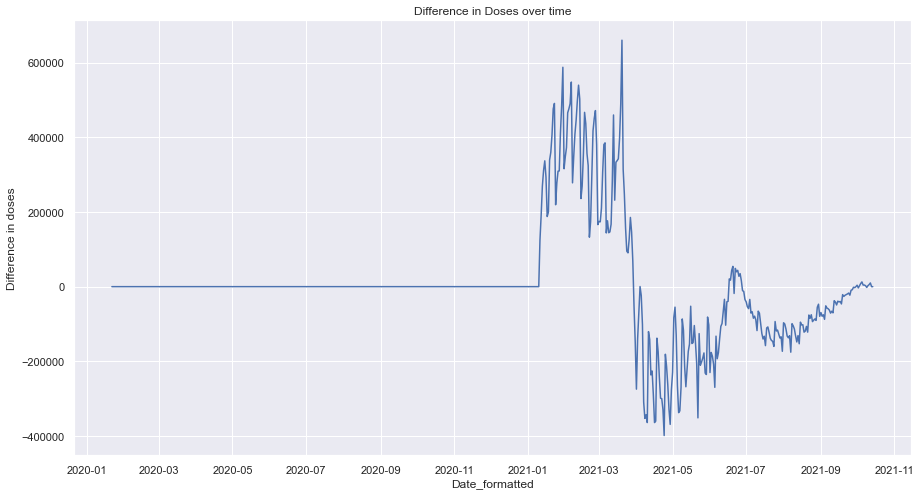

In [165]:
# Using Groupby and .sum( ) to calculate the difference between first and second dose per province/state over time
# Define a new variable, total_doses_time

Total_doses_time = cov_vac_new.groupby("Date_formatted")[["First Dose","Second Dose"]].sum()

# Calculate the difference in doses by adding a new column, "Difference in Doses"
Total_doses_time["Difference in doses"] = Total_doses_time["First Dose"] - Total_doses_time["Second Dose"]

# Sort the resulting DataFrame in Descending order
Total_doses_time.sort_values(by="Date_formatted",ascending = True)

# Plot the resulting DataFrame using a lineplot and note trends.
fig,ax = plt.subplots()
sns.lineplot(x="Date_formatted",y="Difference in doses",data=Total_doses_time).\
set_title("Difference in Doses over time")

Obervation: The data suggests that vaccinations only began in January 2022. The negative differences from April 2022 to October 2022 can be attributed to a higher number of second doses from April 2022 onwards as people in the first group are getting their second shots.

## - by relative (percentage) amounts

In [113]:
# Use groupby and .sum( ) to # calculate the difference between the first and second doses per province/state
# Define a new variable Total_doses_state
Total_doses_state = cov_vac_new.groupby("Province/State")[["First Dose","Second Dose"]].sum()

# Calculate the difference in doses by adding a new column, "Difference in Doses", 
# and converting it into a percentage
Total_doses_state["Percentage of first doses only"] = (Total_doses_state["First Dose"] \
                                                       - Total_doses_state["Second Dose"])*100/ \
                                                       Total_doses_state["First Dose"]

# Sort the resulting DataFrame in Descending order
Total_doses_state.sort_values(by="Percentage of first doses only",ascending = False)

,First Dose,Second Dose,Percentage of first doses only
Province/State,,,
Turks and Caicos Islands,3052822,2915136,4.510122
Isle of Man,4226984,4036345,4.510048
Anguilla,4931470,4709072,4.509771
British Virgin Islands,5166303,4933315,4.509763
Cayman Islands,3522476,3363624,4.509669
Channel Islands,3287646,3139385,4.509640
Montserrat,5401128,5157560,4.509577
Falkland Islands (Malvinas),3757307,3587869,4.509560
Gibraltar,5870786,5606041,4.509532


# Summary of Initial Insights
- The data suggests that:
    - Gibraltar has the highest number of individuals who have a received a first dose but not a second dose.
    - The Turks and Caicos Islands have the highest percentage of individuals who have received a first dose but not a second dose
    -In general, the number of second doses lag behind the first doses - they exhibit a sinusoidal relationship where as the first doses decrease, the second doses steadily increase and vice versa. This indicates that people who are having their first doses are actually getting their second jabs.

# Overview of percentage of first and Second doses across all provinces

<Figure size 1080x576 with 0 Axes>

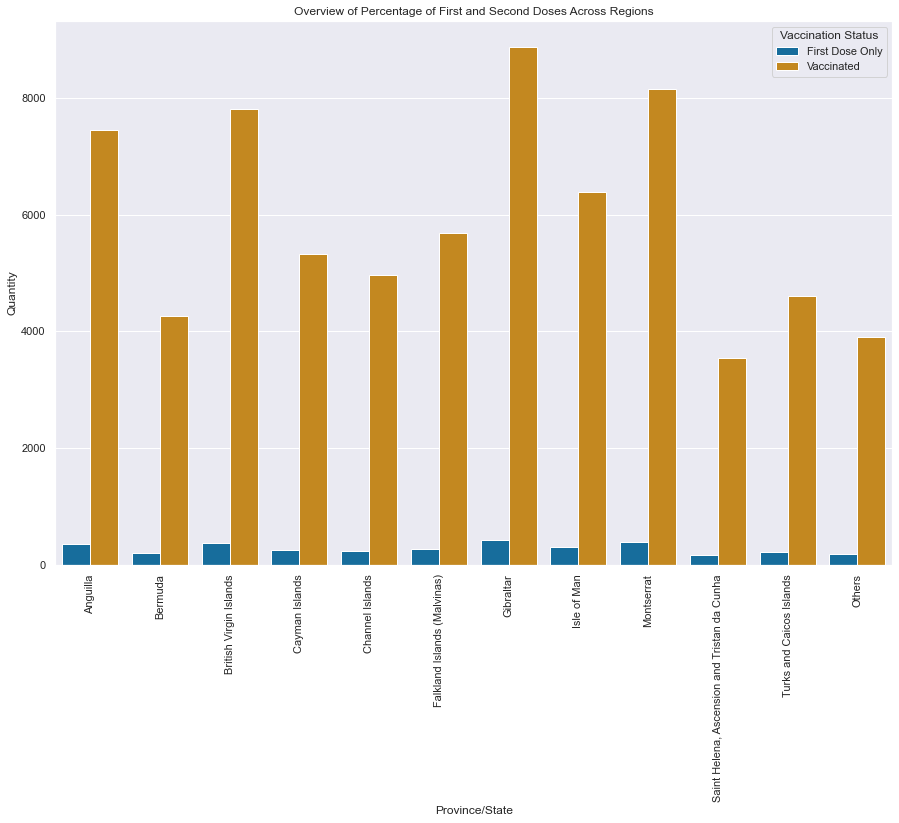

In [118]:
# Find the difference of the total number of First Doses over the total number of second doses.
vac['First Dose Only'] = vac['First Dose'] - vac['Second Dose']

# Melt the 'vac' DataFrame so that it can be read as a long form table by Python.
vac_melt = pd.melt(vac, id_vars =['Province/State', 'Country/Region', 'Date'], \
                   value_vars =['First Dose Only', 'Vaccinated'])

# Rename the columns of vac_melt for easier comprehension using a dictionary.
vac_melt. rename(columns = {'variable':'Vaccination Status', 'value':'Quantity'}, inplace = True)

# Set the figure size.
plt.figure(figsize = (15,8))

# Create subplots using plt.
fig, ax = plt.subplots()

# Plot a barplot showing the different vaccination statuses by count across all regions
ax = sns.barplot(x='Province/State', y='Quantity', hue='Vaccination Status', \
                 palette="colorblind",data=vac_melt, ci=None)

# Set the graph title and set tick labels as 90 to avoid missing x labels.
ax.set_title("Overview of Percentage of First and Second Doses Across Regions")
ax.set_xticklabels(ax.get_xticklabels( ),rotation = 90)

# Save the resulting figure as a PNG file.
fig.savefig("LSE_C2_Assgnmt_Overview_of_Percentage_of_First_and_Second_Doses_Across_Regions.png")

Observations: The number of first doses are roughly equal across all regions. Gibraltar, Monsterrat and the British Virgin Islands are the top three provinces with the most number of vaccinated people. Additional questions for further exploration: are there reasons why certain provinces have higher vaccinated counts or is this due to population size only?
The government may also consider calculating the optimum number of vaccinated individuals to achieve herd immunity (https://pubmed.ncbi.nlm.nih.gov/31590904/) so that each province can keep the pandemic at bay and open up its economy soon.

# Have Deaths per region reached a peak?

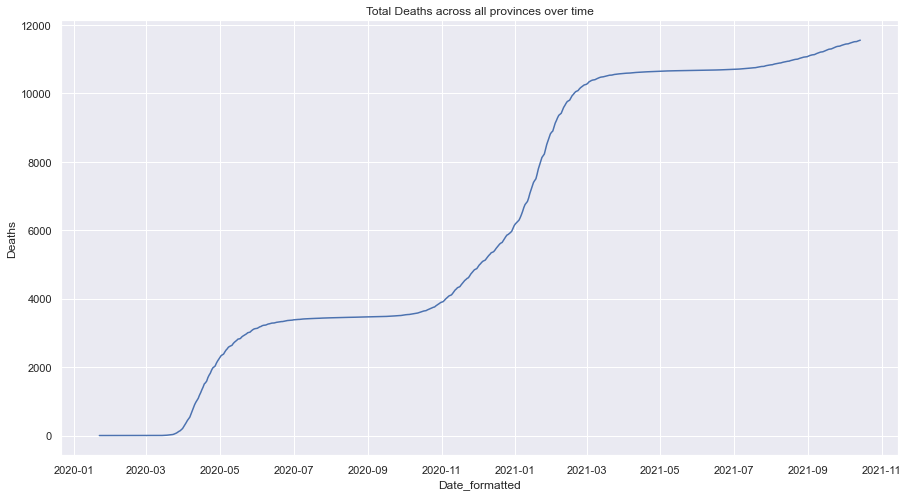

In [142]:
# Define a new variable, Total_deaths_state_time, to contain the groupby element
# Use .groupby( ) and .sum() to aggregate the Death count by province and date
Total_deaths_state_time = cov_vac_new.groupby(["Province_State","Date_formatted"])[["Deaths"]].sum()

# View the new DataFrame
Total_deaths_state_time

# Use sns.lineplot to display the trend of deaths across all regions over time.
sns.lineplot(x="Date_formatted",y="Deaths",data=Total_deaths_state_time, ci = None, \
             palette="colorblind") \
             .set_title("Total Deaths across all provinces over time")

# Set the figure size as (15,8) to increase the size of the plot.)
sns.set(rc = {'figure.figsize':(15,8)})

Observation: 
- The data suggests that deaths have not reached a peak yet, as deaths continue to rise over time. According to Reuters (https://graphics.reuters.com/world-coronavirus-tracker-and-maps/), peaks can be observed as curves that rise upwards and fall downwards. 
- However, this could be misleading as there are Provinces/States that could be outliers, which might skew the data.

## Removing outliers that might skew the data

In [57]:
# Use .groupby(), .sum() to aggregate the death count 
province_death = cov_vac_new.groupby("Province/State")[["Deaths"]].sum()

# Use .sort_values() to sort the data in descending order
# View the DataFrame and find the Province/State that skews the dataset
province_death.sort_values(by="Deaths",ascending=False)

,Deaths
Province/State,
Others,46987145.0
Channel Islands,37130.0
Gibraltar,25412.0
Isle of Man,15051.0
Bermuda,10353.0
Turks and Caicos Islands,5612.0
British Virgin Islands,3573.0
Cayman Islands,911.0
Montserrat,539.0


Clearly, the province/state called "Others" has a far higher number of deaths compared to the rest of the data and is skewing the data set.

In [120]:
# validating outliers by calculating the upper and lower limits using describe()
province_death.describe()

,Deaths
count,1.200000e+01
mean,3.923813e+06
std,1.356144e+07
min,0.000000e+00
25%,4.102500e+02
50%,4.592500e+03
75%,1.764125e+04
max,4.698714e+07


In [121]:
# Calculate the first and third quantile using quantile
Q1 = province_death["Deaths"].quantile(0.25)
Q3 = province_death["Deaths"].quantile(0.75)

# Calculate the interquartile range
IQR = Q3- Q1

# Print results.
print("Q1",Q1)
print("Q3",Q3)
print("IQR",IQR)

Q1 410.25
Q3 17641.25
IQR 17231.0


In [130]:
# Specifiy a condition to filter out outliers
condition = ~((province_death["Deaths"] > (Q1 - 1.5 * IQR)) & (province_death["Deaths"] < (Q3 + 1.5 * IQR)))

# Filter our DataFrame based on condition.
province_death_outlier = province_death[condition]
province_death_outlier

,Deaths
Province/State,
Others,46987145.0


There is strong statistical evidence that the "Others" province is the only outlier.

In [132]:
# Add a new column, "Month" to the merged DataFrame, cov_vac_new.
cov_vac_new["Month"] = pd.to_datetime(cov_vac_new['Date_formatted']+pd.offsets.MonthBegin(-1))

# View the DataFrame
# Note that a warning is displayed here.
cov_vac_new

<ipython-input-132-95ec81e522cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cov_vac_new["Month"] = pd.to_datetime(cov_vac_new['Date_formatted']+pd.offsets.MonthBegin(-1))


,Province/State,Country/Region,Date_formatted,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised,Month
0,Anguilla,United Kingdom,2020-01-22,0,0,0,0.0,0.0,0.0,0.0,2020-01-01
1,Anguilla,United Kingdom,2020-01-23,0,0,0,0.0,0.0,0.0,0.0,2020-01-01
2,Anguilla,United Kingdom,2020-01-24,0,0,0,0.0,0.0,0.0,0.0,2020-01-01
3,Anguilla,United Kingdom,2020-01-25,0,0,0,0.0,0.0,0.0,0.0,2020-01-01
4,Anguilla,United Kingdom,2020-01-26,0,0,0,0.0,0.0,0.0,0.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...
7579,Others,United Kingdom,2021-10-10,1070,1216,1070,137735.0,8154306.0,0.0,378.0,2021-10-01
7580,Others,United Kingdom,2021-10-11,1300,1604,1300,137763.0,8193769.0,0.0,386.0,2021-10-01
7581,Others,United Kingdom,2021-10-12,1482,2027,1482,137944.0,8231437.0,0.0,386.0,2021-10-01
7582,Others,United Kingdom,2021-10-13,0,0,0,138080.0,8272883.0,0.0,0.0,2021-10-01


In [137]:
# Rename the "Province/State" column as it cannot be used to filter the "Others" province.
# Note that this will change previous code snippers related to cov_vac_new if rerun
cov_vac_new.rename(columns = {"Province/State":"Province_State"},inplace= True)

# Create a new DataFrame filtering out the "Others" province
cov_vac_new2 = cov_vac_new[cov_vac_new.Province_State!="Others"]

# View the new dataFrame
# Note that a warming appears here
cov_vac_new2

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Province_State,Country/Region,Date_formatted,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised,Month
0,Anguilla,United Kingdom,2020-01-22,0,0,0,0.0,0.0,0.0,0.0,2020-01-01
1,Anguilla,United Kingdom,2020-01-23,0,0,0,0.0,0.0,0.0,0.0,2020-01-01
2,Anguilla,United Kingdom,2020-01-24,0,0,0,0.0,0.0,0.0,0.0,2020-01-01
3,Anguilla,United Kingdom,2020-01-25,0,0,0,0.0,0.0,0.0,0.0,2020-01-01
4,Anguilla,United Kingdom,2020-01-26,0,0,0,0.0,0.0,0.0,0.0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...
6947,Turks and Caicos Islands,United Kingdom,2021-10-10,1264,1437,1264,23.0,2898.0,0.0,446.0,2021-10-01
6948,Turks and Caicos Islands,United Kingdom,2021-10-11,1536,1896,1536,23.0,2898.0,0.0,456.0,2021-10-01
6949,Turks and Caicos Islands,United Kingdom,2021-10-12,1751,2395,1751,23.0,2898.0,0.0,456.0,2021-10-01
6950,Turks and Caicos Islands,United Kingdom,2021-10-13,0,0,0,23.0,2905.0,0.0,0.0,2021-10-01


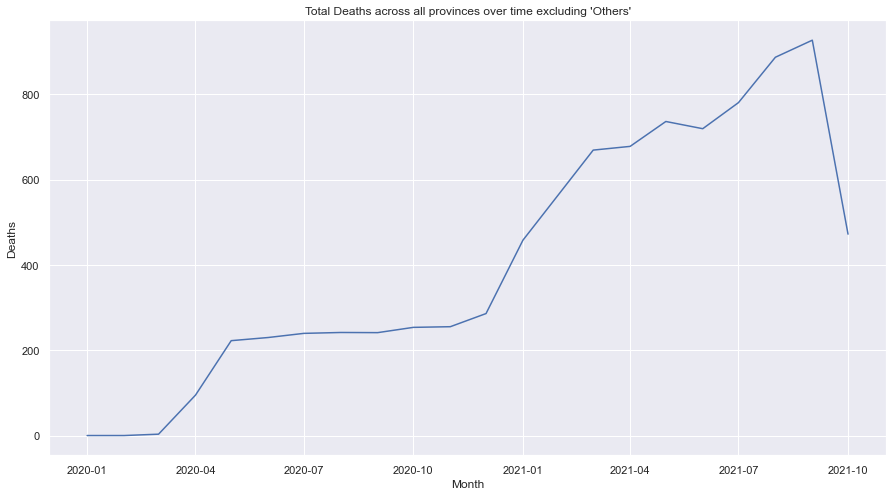

In [145]:
# Create a new DataFrame to using .groupby() and .sum() to aggregate the number of deaths 
# across provinces per month, excluding the "Others" province
Total_deaths_state_time2 = cov_vac_new2.groupby(["Province_State","Month"])[["Deaths"]].sum()

# View the DataFrame
Total_deaths_state_time2

# Plot the DataFrame as a line plot without confidence intervals.
fig, ax = plt.subplots()
sns.lineplot(x="Month",y="Deaths",data=Total_deaths_state_time2, ci = None, palette="colorblind")\
             .set_title("Total Deaths across all provinces over time excluding 'Others'")
sns.set(rc = {'figure.figsize':(15,8)})

# Save the resulting graph as a PNG
fig.savefig("Total_Deaths_across_all_provinces_over_time_excluding_'Others'.png", dpi=144)

Observations: Although the graph with "Others" excluded shows a similar shape, it appears much more jagged and straight, and shows a drop in the number of deaths towards August/ September 2021 to October 2021, unlike the "Others" death lineplot. This suggests that the number of deaths in the UK were decreasing, but not for the "Others" province.

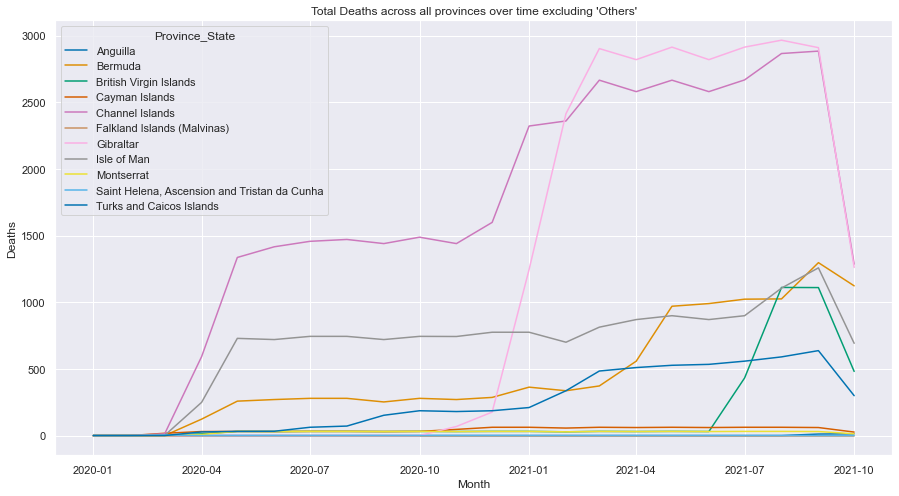

In [155]:
# Plot the DataFrame as a line plot without confidence intervals by province
fig, ax = plt.subplots()
sns.lineplot(x="Month",y="Deaths",data=Total_deaths_state_time2, ci = None, hue="Province_State",\
             palette="colorblind")\
             .set_title("Total Deaths across all provinces over time excluding 'Others'")
sns.set(rc = {'figure.figsize':(15,8)})

# Save the resulting graph as a PNG
fig.savefig("Total_Deaths_across_by_provinces_over_time_excluding_'Others'.png", dpi=144)

Observations: When the deaths are split by province it is evident that both Gibraltar and Channel Islands have sudden increase in deaths from approxiamtely December 2020 to mid February 2021, before plateauing and dropping at October 2021.
The other provinces show a plateauing of deaths with a slight upward trajectory from 2020 to mid August 2021, before plummeting at the October 2021.

# Area with the highest number of Recoveries

In [152]:
# Use .groupby() on the merged DataFrame to aggregate the total number of Recovered cases
# sorted in descending order
# We use cov_vac_new2 to include the "Month" column and exclude "Others"
total_recover_state = cov_vac_new2.groupby(["Province_State","Month"])[["Recovered"]]\
                                  .sum() \
                                   .sort_values(by="Recovered" \
                                                 ,ascending = True)

# View the DataFrame
total_recover_state

Recovered
Province_State              Month                
Anguilla                    2020-01-01        0.0
Gibraltar                   2020-02-01        0.0
                            2020-01-01        0.0
Falkland Islands (Malvinas) 2021-10-01        0.0
                            2021-09-01        0.0
...                                           ...
Gibraltar                   2021-06-01   126235.0
                            2021-03-01   128563.0
                            2021-05-01   129902.0
                            2021-07-01   133975.0
Channel Islands             2021-07-01   148288.0

[242 rows x 1 columns]

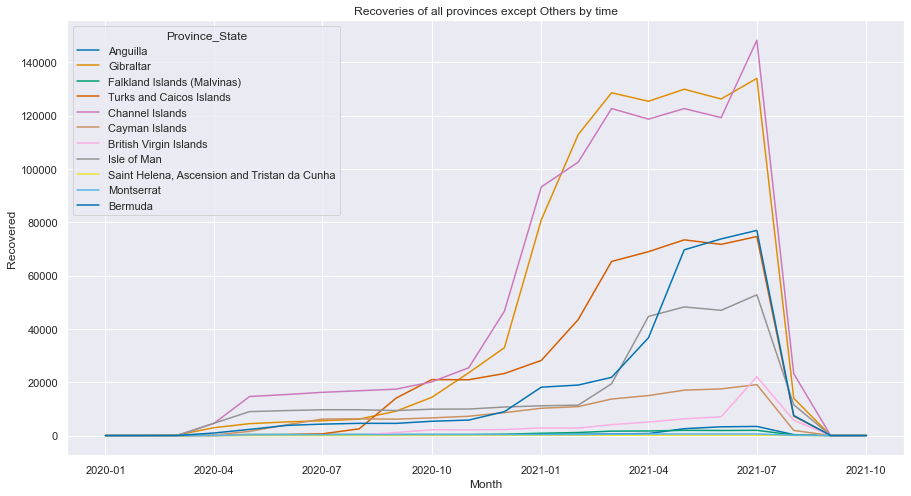

In [154]:
# Create a subplot to store the figure
fig, ax = plt.subplots()

# Plot the total_recover_state DataFrame as a lineplot
sns.lineplot(x="Month",y="Recovered",data=total_recover_state,hue="Province_State",palette="colorblind")\
.set_title("Recoveries of all provinces except Others by time")

# Save the resulting image to the directory.
fig.savefig("Recoveries_of_all_provinces_except_Others_by_time", dpi=144)

The graph is very noisy, but what is evident is that recoveries increase after October 2010 onwards (especially Gibraltar and the Channel islands), peaking at July 2021 before plummeting to nearly 0 in October 2021. The plummet suggests that data collection may be incomplete or there was an error in data collection.

Summary of Observations:
- There isn't a clear, consistent trend in the data. However, the number if deaths and recovered show a consistent, steady rise until mid 2021 before sharply dropping as the months reach Oct 2021 (if you exclude "Others"). Recoveries across all provinces except "Others", also show a similar trend, spiking at about July 2021 before plummeting. These drops suggest that there may be missing data in the data collection process.
- A consistent outlier is the the "Others" province/state. This outlier is masking the other datasets as its values are too large and causing the data to be skewed - in particualr the number of deaths. This group should be removed so that we can see trends within other provinces; for isntance, the death rate actually falls in non-"Other" provinces after Oct21
- Converting the Date into Months preserves the original trend, however the line graph becomes less smooth.
- It cannot be said for certain whether deaths have reached a peak. It is likelier that the Channel Islands and Gibraltar may have reached a peak as there is a sharp decline after Oct21, but less so likely for other provinces. the slight decline means that there is a possibility deaths could still increase. Further monitoring across time is needed for clearer insights.
- Among vaccinated individuals, approximately 4.5% of all individuals have received a first dose across all regions. Gibraltar shows the highest percentage by number, where as Turks and Caicos islands has the highest percentage.
- The Channel Islands have has had the most recoveries, but it has not been consistent over time.

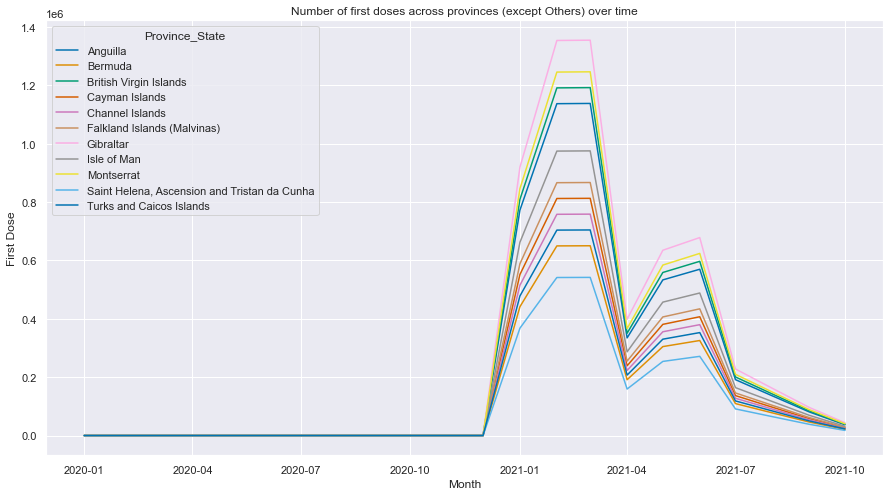

In [350]:
# Graphing the trends of First and Second Doses over time by province

# Define a new variable to store the groupby object, grouping by month and First Dose
# cov_vac_new2 contains month so no need to re-apply techniques
Firstdose_per_state_time = cov_vac_new2.groupby(["Province_State","Month"])[["First Dose"]]\
.sum()

# View the DataFrame
Firstdose_per_state_time

# Plot the DataFrame using sns.lineplot
sns.lineplot(x="Month",y="First Dose",data=Firstdose_per_state_time, ci = None,\
             hue="Province_State",palette="colorblind")\
.set_title("Number of first doses across provinces (except Others) over time")

# Set the figure size
sns.set(rc = {'figure.figsize':(15,8)})

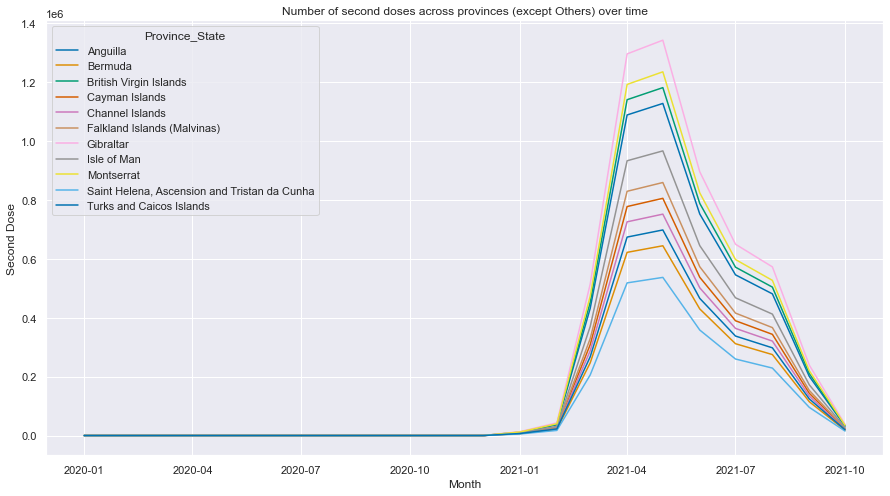

In [349]:
# Define a new variable to store the groupby object, grouping by month and Second Dose
# cov_vac_new2 contains month so no need to re-apply techniques
Seconddose_per_state_time = cov_vac_new2.groupby(["Province_State","Month"])[["Second Dose"]].sum()

# View the DataFrame
Seconddose_per_state_time

# Plot the DataFrame using sns.lineplot
sns.lineplot(x="Month",y="Second Dose",data=Seconddose_per_state_time, ci = None,hue="Province_State",\
             palette="colorblind").set_title("Number of second doses across provinces (except Others) over time")

# Set figure size
sns.set(rc = {'figure.figsize':(15,8)})

How will this visualisation be valuable for the government to use in making informed decisions?

- By helping them strategise where to allcoate resources to. For instance, don't spend marketing campaigns in Channel Islands as they have the highest number of recoveries. Allocate marketing budget on increasing the number of second vaccinated people in other provinces, such as Gibraltar. Find the best platform (eg print media or digital ads) and incentive plan to convince first dose individuals to get their second jabs. Assuming that the data also lacks people who are fully unvaccinated, the government should aim to increase the vaccination rates of unvaccinated groups to improve herd immunity.

- The possibility that deaths may not have reached a peak means that the government needs to allocate more resources in preparing for additional waves in the coming months.

Suggestions for improvements / future data requirements
- Split up the "Others" into more provinces to increase granularity per region.

- Investigate why outliers exist. Is it an error in terms of data collection or are there contextual cues we are not aware of (eg no lockdowns implemented, or a superspreader event)?

- Provide more data columns (eg 7-day average, GDP, cases per capita) and procure more accurate data

- Also, all the provinces follow the same pattern for vaccination which is unrealistic. It would make sense for there to be some natural variation in how first and second doses were administered in each region. The government can use these visualisations to plan when to administer booster shots (eg past October 2021) and investigate if there were errors in the data collection procedure.

# Hospitalisation by Regions and peak Analysis

Which regions have experienced a peak in hospitalisation numbers and if there are regions that have not reached a peak 
yet. Demonstrate if the provided functions can assist you to answer these questions. Provide reasons for your answer.

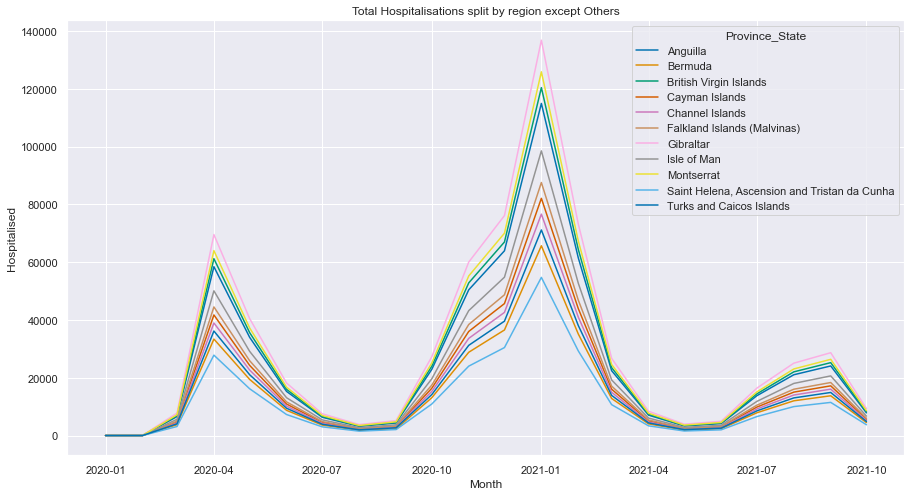

In [323]:
# Define a new variable to store the groupby object, grouping by month and Hospitalisations
# cov_vac_new2 contains month so no need to re-apply techniques
Hospitalisations_per_province_time = cov_vac_new2.groupby(["Province_State","Month"])[["Hospitalised"]].sum()

# View the DataFrame
Hospitalisations_per_province_time

# Plot the DataFrame using sns.lineplot
sns.lineplot(x="Month",y="Hospitalised",data=Hospitalisations_per_province_time, ci = None,\
             hue="Province_State", palette="colorblind")\
             .set_title("Total Hospitalisations split by region (except Others)")

# Set figure size
sns.set(rc = {'figure.figsize':(15,8)})

Observations: The data suggests that 3 peaks have occurred in terms of Hospitalisations across all regions - on April 2020, January 2021 and approximately September 2021. The third peak shows a downward trend over time, implying that the peak is over - that is, that none of the provinces are experiencing a peak in Hospitalisations after October 2021.

# Analysing Twitter Data

In [302]:
# Read the tweets.csv file and create a DataFrame
tweets = pd.read_csv("tweets.csv")
#tweets

# Use .info() and .head() to print the DataFrame head, shape and data types
print(tweets.info())
print(tweets.head())
print(tweets.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-null   int64

In [307]:
# Use value_counts to find out how many tweets were retweeted and favourited
print(tweets.retweet_count.value_counts())

0       2818
1        570
2        190
3         96
4         54
        ... 
212        1
304        1
398        1
466        1
1565       1
Name: retweet_count, Length: 67, dtype: int64


In [308]:
print(tweets.favorite_count.value_counts())

0       2240
1        682
2        252
3        174
4        100
        ... 
72         1
80         1
88         1
94         1
1991       1
Name: favorite_count, Length: 117, dtype: int64


In [309]:
# Identifying all the hashtags in the "text" column of the tweets.csv

# Create a new DataFrame, tweets_text, by filtering the "text" column in tweets
# change the text type to string 
tweets_text = tweets["text"].astype(str)

# Display the shapw of the new DataFrame
tweets_text.shape

(3960,)

In [310]:
# We only want to process non-empty tweets
# And thus must remove empty tweets using a lambda function

# Create a new DataFrame to contain the non-empty tweets
tweets_text_non_empty = tweets_text.apply(lambda x : x if x.strip()!= None else None)

# Display the shape of the new DataFrame
tweets_text_non_empty.shape

(3960,)

In [311]:
# Utilising a for loop to count the values in the list

# Create an empty output to store the results of the for loop
tags =[]

# Create a list y containing all the possible text values in the tweets "text" column
for y in [x.split(' ') for x in tweets_text_non_empty]:

    # Create a new element z to denote an element in y
    for z in y:
        # Use an if statement to append all hashtags to the empty output "tags"
        if "#" in z: 
            tags.append(z)

# Convert the "tags" output to a series
# Use value_counts to see howmany times a hashtag appears
tags = pd.Series(tags).value_counts()

In [312]:
# Display the number of rows and columns for the tags output
tags.shape

(4776,)

In [314]:
# Display the first 30 results of the tags list in descending order
tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#COVID19Pandemic          80
#CoronavirusOutbreak      80
#covid19uk                80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Covid_19                 63
#datavisualization        63
#Shanghai                 63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [315]:
#Identify the top trending hashtags.

# convert the list of hashtags to a DataFrame using pd.DataFrame
tags_df = pd.DataFrame(tags).reset_index()

# Display the columns in the tags DataFrame
tags_df.columns

Index(['index', 0], dtype='object')

In [316]:
# Ensuring that the new tags DataFrame has the same characteristics of a Pandas DataFrame

# Rename the columns
tags_df.rename(columns = {"index":"Hashtags",0:"Quantity"}, inplace = True)

# Convert "Quantity" to an integer
tags_df["Quantity"].astype(int)

# Display information about tags_df to confirm the conversion wa ssuccessful
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Hashtags  4776 non-null   object
 1   Quantity  4776 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 74.8+ KB


In [317]:
# Sort the tags DataFrame in descending order
tags_df.sort_values(by="Quantity", ascending= False)

# Filter by tags that have more than 100 counts to make it easier to visualise
tags_df_filtered = tags_df[tags_df.Quantity>100]

# View the filtered DataFrame
tags_df_filtered 

,Hashtags,Quantity
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
5,#COVID,108
6,#covid,104
7,#Greece,103


Text(0.5, 1.0, 'Distribution of Top Twitter Hashtags with over 100 counts')

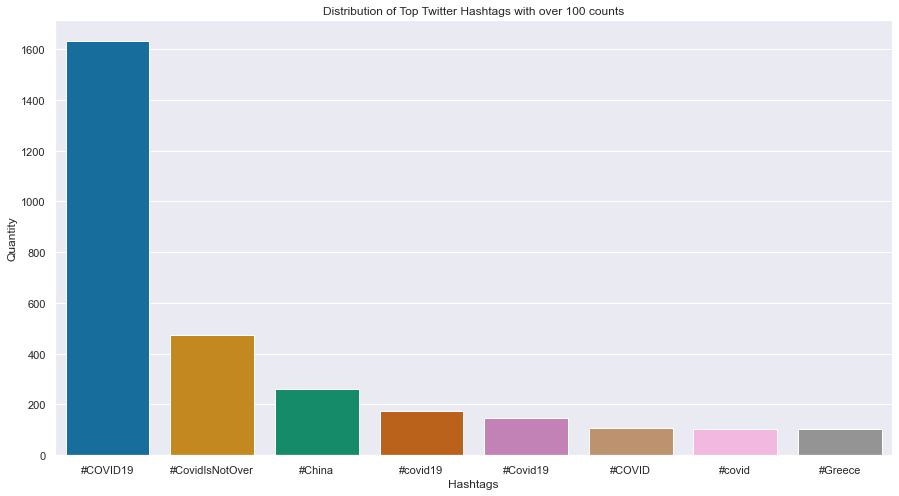

In [325]:
# Visualise the hashtags using a barplot to show an overview of the 
# top trending hashtags related to COVID

sns.barplot(x="Hashtags",y="Quantity",data=tags_df_filtered,palette="colorblind").\
set_title("Distribution of Top Twitter Hashtags with over 100 counts")

Observation: As expected, Covid- related hashtags are the most popular hashtags in the tweets csv. However, there are other prominent hashtags such as Greece.

Importantly, while the public is aware of COVID as a danger, concerningly there aren't as much #vaccinations or #vaccine hashtags. As a government we can aim to increase the number of vaccinations by incentivising campaigns on Twitter or starting a #vaccinations or #second dose hash tags so as to increase the number of second doses. 

Limitations: While Twitter is a popular social media platform, it is not the only platform out there. We could be missing out on certain customer segments by not scraping Facebook, instagram or Snapchat data. To get a more comprehensive view of what the public is saying about the covid or vaccinations in general, we should also scrape and analyse Facebook and Instagram data too.

# Completing the partial notebook by the consultant

In [166]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [167]:
# Load and select relevant subset of the data
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [168]:
# Select data for a specific province, Channel Islands
sample_ci = sample[sample['Province/State'] == "Channel Islands"]
sample_ci

,Province/State,Date,Hospitalised
2528,Channel Islands,2020-01-22,0.0
2529,Channel Islands,2020-01-23,0.0
2530,Channel Islands,2020-01-24,0.0
2531,Channel Islands,2020-01-25,0.0
2532,Channel Islands,2020-01-26,0.0
...,...,...,...
3155,Channel Islands,2021-10-10,481.0
3156,Channel Islands,2021-10-11,491.0
3157,Channel Islands,2021-10-12,491.0
3158,Channel Islands,2021-10-13,0.0


In [170]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)
    plt.legend(loc="best")

In [171]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

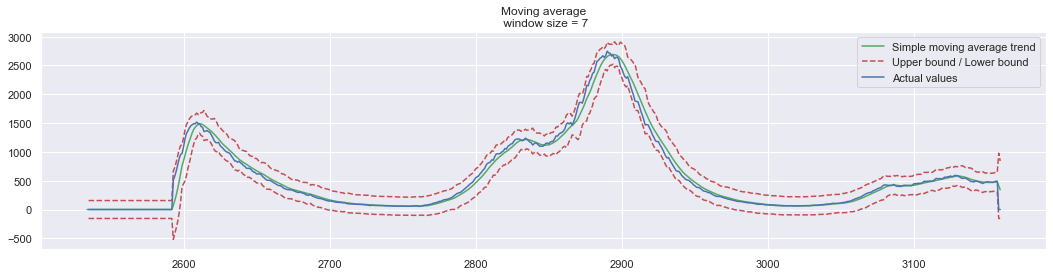

In [173]:
# Demonstrate the use of the function to plot moving averages
# inputting the Hospitalised data for Channel Islands for a 7-day window frame

plot_moving_average(sample_ci.Hospitalised, 7, plot_intervals=True, scale=1.96)

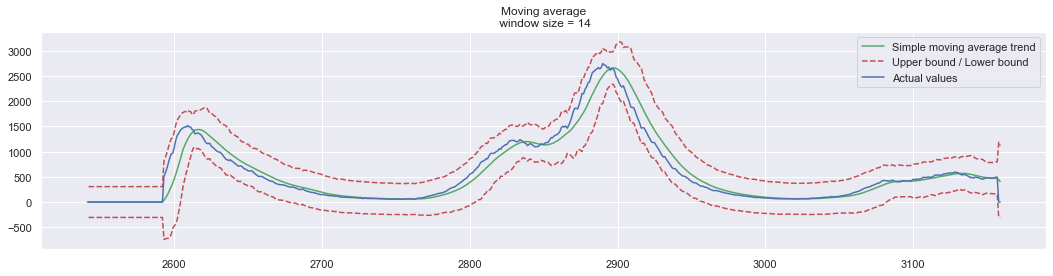

In [174]:
# inputting the Hospitalised data for Channel Islands for a 14-day window frame
plot_moving_average(sample_ci.Hospitalised, 14, plot_intervals=True, scale=1.96)

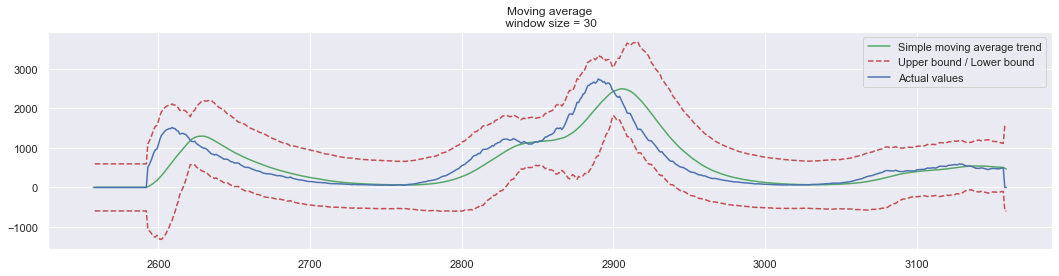

In [176]:
# inputting the Hospitalised data for Channel Islands for a 30-day window frame
plot_moving_average(sample_ci.Hospitalised, 30, plot_intervals=True, scale=1.96)

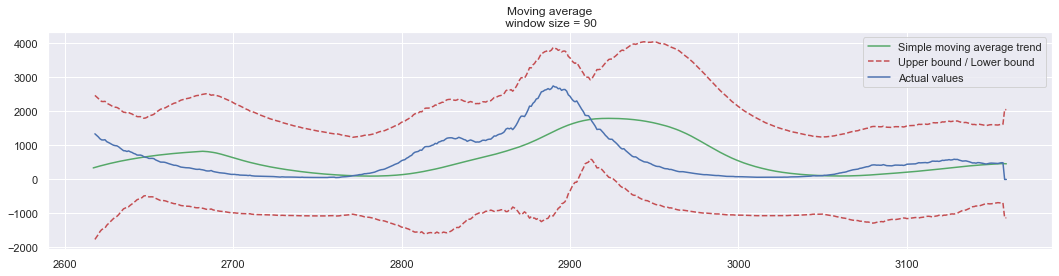

In [177]:
# inputting the Hospitalised data for Channel Islands for a 90-day window frame
plot_moving_average(sample_ci.Hospitalised, 90, plot_intervals=True, scale=1.96)

Observations: The moving average represents the rate of change in a graph. In this case there are a couple of pertinent points:
- The upper and lower bounds become wider with larger windows, indicating higher uncertainty in longer windows
- The simple moving average trend becomes flatter / smoother with higher windows, indicating a simpler trend over higher windows

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [ ]:
# Functional code provided:

# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])

s.sort_values('error', ascending=False).head(3)

I have added comments to each code to show what they do.

In [351]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean

# copy the sample channel islands data as a new variable s
s = sample_ci.copy()

# define a new variable s_rolling, which subsets sample channel islands data
# to only hopistalised cases
# find the rollin mean for the past 7 days
s_rolling = s['Hospitalised'].rolling(window=7).mean()

# define a new column, s_error, which is equivalent to the mean absolute error
# which shows the absolute difference between the rolling mean in the last 7 days
# against the hospitalised cases in the last 7 days
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])

# sort the difference between daily value and rolling 7 day mean in descending order
# show the top 3 values using head
s.sort_values('error', ascending=False).head(3)

,Province/State,Date,Hospitalised,error
2593,Channel Islands,2020-03-27,509.0,436.285714
2594,Channel Islands,2020-03-28,579.0,423.571429
2595,Channel Islands,2020-03-29,667.0,416.285714


The output is useful as it shows the top 3 days in Channel Islands where hospitalisations do not adhere to average rate of change as defined by the rolling mean. There is a possibility that these cases are outliers and should be checked to see why the data is erroneous. Perhaps it could be a data collection gltch, or a spike in covid cases in a vulnerable population. Either way, the high error value warrants further investigation.

### Question 3:

The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

#### Question 3.1
- What is the difference between qualitative and quantitative data? How can these be used in business predictions?

Qualitative data consists of data from observations, such as surveys or questionnaires; they cannot be measured numerically. Quantitative data is data that can be measured numerically and has a certain order to it (ie they're nominal).

There are a variety of forecasting methods depending on the type of data you're working with. For instance, if you  are working with qualitative data it would make sense to use the Delphi method or market research to gain opinions about a new service or policy. However it would not be relevant to use time-series for this data type.

Similarly, if you want to envision product inventory for the next quarter, it would make more sense to make forecasts using time-series graphs and extrapolate from historic data or seasonal trends. 

#### Question 3.2 
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Continuous improvement is required because there will be bound to be failures or obstacles in any project or process. Continuous imporvement is needed to achieve the optimal result and beyond. From a different perspective, not implementing continuous improvement could lead to stagnancy and render current processes obsolete. In a constantly changing world, becoming obsolete is a serious competitive disadvantage that would ruin any business.



#### Question 3.3
- As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

No - in addition to good governance, it would be best to apply a Data Ethics Framework as well. Without a Data Ethics Framework, no one in our team will know how they are responsible for the data, and we could risk team members leaking information unintentionally. Furthermore, a Data Ethics Framework aligned with company culture makes it easier to make an ethical decision should a team member face one.

# Limitations in the Analysis and Visualisations

- We could be missing out on certain customer segments by not scraping Facebook, instagram or Snapchat data. 
- Many of the data visualisations are noisy when split to different provinces. Using a matrix showing region name by row and metrics as column could make it easier to compare / analyse trends.
- The cases dataset is missing values under the recovered or hospitalised columns from 5/8/2020 and 13/10/2020 onwards, implying that data collection may be incomplete.
- The data is unrealistic - it does not corroborate with actual covid data (eg different areas showing the same vaccination trends).
- The “Others” Province is a massive outlier and wholly skews the dataset. 
- There are 2 missing values in the dataset for Bermuda on the 21st and 22nd of September 2020.


# Kurtosis of provided dataset

In [220]:
#!pip install scipy as sc

#from scipy import stats
#from scipy.stats import kurtosis

In [244]:
# Subset the merged DataFrame with only relevant columns
cov_vac_new_subset= cov_vac_new[["Vaccinated","First Dose","Second Dose","Deaths","Cases",\
                                 "Recovered","Hospitalised"]]

# Apply the pandas.kurtosis method, specifying axis=0
cov_vac_new_subset.kurtosis(axis=0) 

# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.kurtosis.html

Vaccinated       5.427624
First Dose       7.016109
Second Dose      5.427624
Deaths          17.560852
Cases           28.268926
Recovered        8.032805
Hospitalised     4.326950
dtype: float64

In [245]:
# Find the excess kurtosis by subtracting 3
cov_vac_new_subset.kurtosis(axis=0)  -3

Vaccinated       2.427624
First Dose       4.016109
Second Dose      2.427624
Deaths          14.560852
Cases           25.268926
Recovered        5.032805
Hospitalised     1.326950
dtype: float64

According to https://pyshark.com/kurtosis-in-python/, a positive excess kurtosis indicates a leptokurtic distribution, which implies that the all the dataset columns have extreme tails and are far from a normal distribution.

# Comparing data means using an upaired t-test 

I will attempt to prove that the means of the dataset provided are very different to WHO's data, given the same provinces and the same date range.

Sources: 
- https://covid19.who.int/data
- https://www.hackdeploy.com/python-t-test-a-friendly-guide/

In [327]:
from scipy import stats

# WHO data was filtered with the same province names except Channel Islands and Others
# in the same date range (22Jan20-14Oct21) as the provided dataset
# A pivot table was then made to show the average per province
# To make the comparison accurate we use the average number of new cases and average number of deaths
# Assumption: That the dataset provided shows the number of cases per day and is not cumulative.

# Use WHO data as a DataFrame
b = pd.read_csv("WHO-COVID-data-Course2 Assignment.csv")
b

,Province/Region,Average of New_cases,Average of New_deaths
0,Anguilla,1.018987,0.001582
1,Bermuda,8.764241,0.147152
2,British Virgin Islands,4.311709,0.058544
3,Cayman Islands,1.575949,0.003165
4,Falkland Islands (Malvinas),0.109177,0.000000
5,Gibraltar,9.030063,0.153481
6,Isle of Man,13.079114,0.085443
7,Montserrat,0.064873,0.001582
8,Saint Helena,0.000000,0.000000
9,Turks and Caicos Islands,4.585443,0.036392


In [328]:
# Group the average number of new cases & deaths in the uk_cases csv via a pviot table
# Load the csv as a dataframe

a = pd.read_csv("uk_cases_t_test.csv")
a

,Province/State,Average of Cases,Average of Deaths
0,Anguilla,55.878165,0.037975
1,Bermuda,1088.003175,16.433333
2,British Virgin Islands,450.887658,5.653481
3,Cayman Islands,344.550633,1.441456
4,Falkland Islands (Malvinas),32.408228,0.000000
5,Gibraltar,2237.109177,40.208861
6,Isle of Man,1403.691456,23.814873
7,Montserrat,15.120253,0.852848
8,"Saint Helena, Ascension and Tristan da Cunha",2.275316,0.006329
9,Turks and Caicos Islands,1190.851266,8.879747


In [329]:
# Convert the Cases data from a,b to a Series
a_2= pd.Series(a["Average of Cases"])
b_2 = pd.Series(b["Average of New_cases"])

In [330]:
# Convert the Deaths data from a,b to a Series
a_2_death= pd.Series(a["Average of Deaths"])
b_2_deaths = pd.Series(b["Average of New_deaths"])

I will use WHO's dataset as a standard of reliability. 

We define two hypotheses:
- Null Hypothesis: µa = µb (the means of the WHO and provided dataset are equal)
- Alternate Hypothesis: µa ≠ µb (the means of both populations are not equal)

If the means are equal, we can be confident that the data is reliable.
If the means are not equal, we have to be sceptical about the data's reliability.

In [331]:
# run an independent sample T-test using scipy for cases
tStat, pValue = stats.ttest_ind(a_2, b_2, equal_var = False) 

#print the P-Value and the T-Statistic
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) 

P-Value:0.020504661348414038 T-Statistic:2.8061355238510046


Observations:
- The resulting P-value is lower than or equal to 0.05, hence we can assert that there is enough evidence to reject the Null Hypothesis. Therefore we accept the Alternate Hypothesis that the means of both the populations are not equal.

In [333]:
# run an independent sample T-test using scipy for cases
tStat, pValue = stats.ttest_ind(a_2_death, b_2_deaths, equal_var = False) 

#print the P-Value and the T-Statistic
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) 

P-Value:0.048374636300835334 T-Statistic:2.282355254100807


Observations:
- The resulting P-value is lower than or equal to 0.05, hence we can assert that there is enough evidence to reject the Null Hypothesis. Therefore we accept the Alternate Hypothesis that the means of both the populations are not equal.

## Conclusion

The provided dataset's reliability is questionable due to its excessive kurtosis values and having unequal means to WHO's data.

# Recommendations and areas of further exploration

These results can inform us of the optimal resource allocation system:
- Avoid spending marketing budget in the Channel Islands (highest number of recoveries)
- Instead, allocate marketing budget to increase the number of second doses in Turks and Caicos Islands. 
- Next, research on the best platform (eg print media or digital ads) and incentive plan to convince first dose individuals to get their second jabs. 
- As a government we can aim to increase the number of vaccinations by incentivising campaigns on Twitter or starting a #vaccinations or #second dose hash tags so as to increase the number of second doses. 
- Knowing that deaths may not have peaked but hospitalisations are dropping means that the virus is circulating among vulnerable groups (eg the elderly). This means that we need to allocate more resources to support these groups.
- by planning when to administer booster shots (eg past October 2021)

# Ethical Concerns & Alternative Strategy

- Using this dataset for further decisions may lead to misallocation of resources at best, and more deaths at worst. Data sanity is of utmost importance when dealing with sensitive data as it could mean life or death for the public.
- Consider procuring a more accurate dataset from a new data provider. This will incur additional costs (to check with finance department) and require an additional month to procure the data and another month for further analysis and interpretation, but it could avoid risking further deaths due to wrong courses of action from bad policies.

# Additional Explorations

<AxesSubplot:>

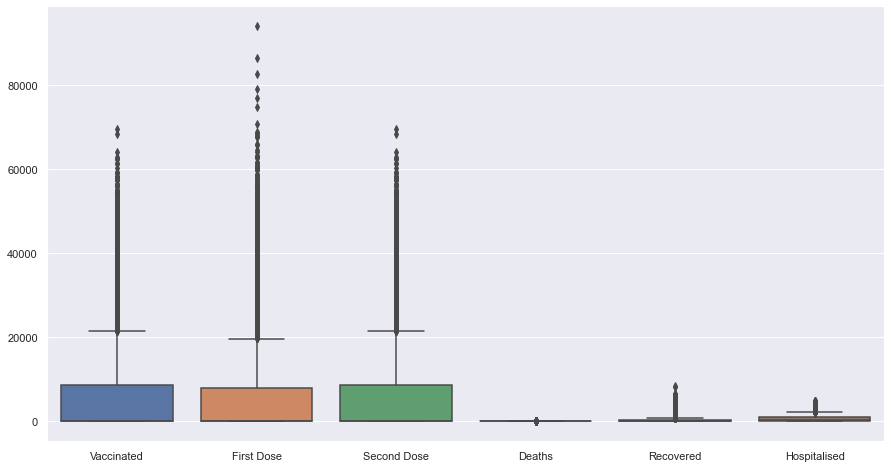

In [347]:
sns.boxplot(data=cov_vac_new2[["Vaccinated","First Dose","Second Dose",\
                               "Deaths","Recovered","Hospitalised"]])

Observation: The dataset contains a lot of outliers, especially in terms of vaccinated, first dose and second dose data. The occurence of these outliers need to be investigated and rectified.

Limitation: Better to split up the boxplot by province or state to get a better understanding of data distribution in each province.

In [48]:
# Combining all metrics into one and checking for trends / relationships among metrics over time

# Make a new dataset by melting the merged DataFrame with relevant metrics
data_new = pd.melt(cov_vac_new,["Province/State","Date_formatted"], 
                   value_vars=["Deaths","Recovered","Cases","Hospitalised",
                               "First Dose","Second Dose"])
#View the DataFrame
data_new

,Province/State,Date_formatted,variable,value
0,Anguilla,2020-01-22,Deaths,0.0
1,Anguilla,2020-01-23,Deaths,0.0
2,Anguilla,2020-01-24,Deaths,0.0
3,Anguilla,2020-01-25,Deaths,0.0
4,Anguilla,2020-01-26,Deaths,0.0
...,...,...,...,...
45499,Others,2021-10-10,Second Dose,1070.0
45500,Others,2021-10-11,Second Dose,1300.0
45501,Others,2021-10-12,Second Dose,1482.0
45502,Others,2021-10-13,Second Dose,0.0


In [67]:
# remove the cases data as it causes the grpah to be skewed out of proportion
data_new2=data_new[data_new.variable!="Cases"]

# rename the province column so it can be filtered
data_new2.rename(columns = {'Province/State':'Province_or_State'}, inplace = True)

# View the new dataframe
data_new2

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Province_or_State,Date_formatted,variable,value
0,Anguilla,2020-01-22,Deaths,0.0
1,Anguilla,2020-01-23,Deaths,0.0
2,Anguilla,2020-01-24,Deaths,0.0
3,Anguilla,2020-01-25,Deaths,0.0
4,Anguilla,2020-01-26,Deaths,0.0
...,...,...,...,...
45499,Others,2021-10-10,Second Dose,1070.0
45500,Others,2021-10-11,Second Dose,1300.0
45501,Others,2021-10-12,Second Dose,1482.0
45502,Others,2021-10-13,Second Dose,0.0


<AxesSubplot:xlabel='Date_formatted', ylabel='value'>

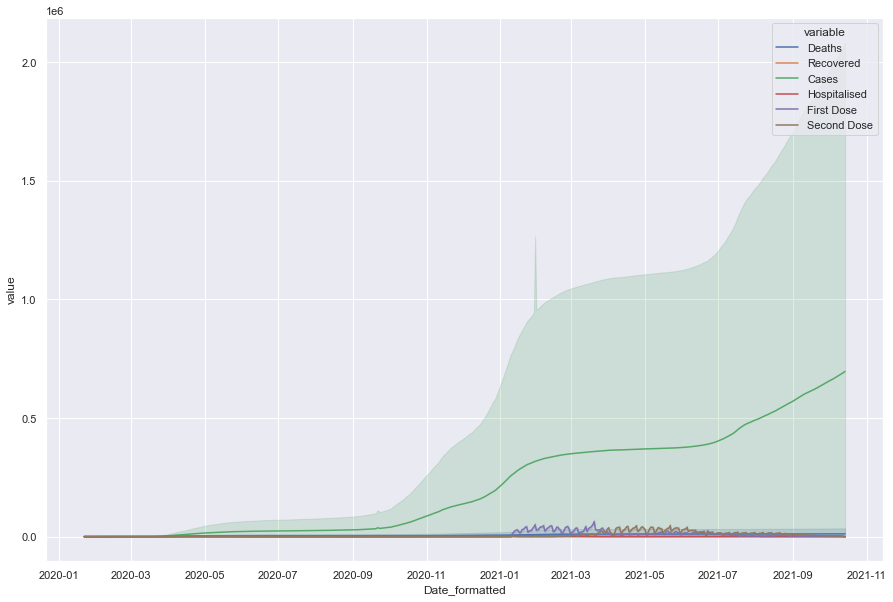

In [90]:
# Plot all the metrics in a lineplot
sns.lineplot(x="Date_formatted",y="value",data=data_new,hue="variable")

<AxesSubplot:xlabel='Date_formatted', ylabel='value'>

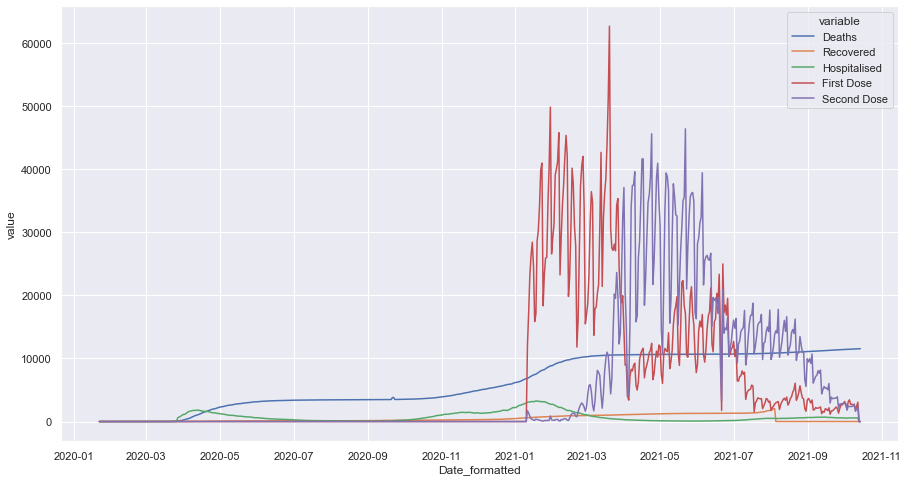

In [54]:
# Plot all the metrics in a lineplot without confidence intervals
sns.lineplot(x="Date_formatted",y="value",data=data_new2,hue="variable", ci=None)

<AxesSubplot:xlabel='Date_formatted', ylabel='value'>

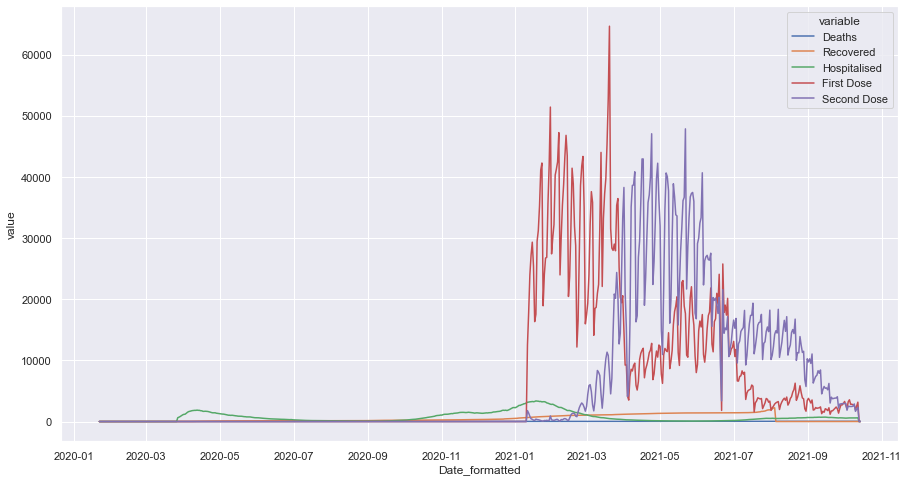

In [348]:
# Plot all the metrics in a lineplot excluding Others
sns.lineplot(x="Date_formatted",y="value",data=data_new2[data_new2.Province_or_State!="Others"],\
             hue="variable", ci=None)

This graph was made to determine vaccine efficacy. Unfortunately it is inconclusive as to whether the vaccines are effective because deaths, hospitalisations and recoveries pale in comparison even after removing Others. If including Others, we can clearly see that the deaths continue to increase despite vaccinations. Further monitoring is needed to explore vaccine efficacy further and to determine its efficacy.